# 🚀 Analysis Route of the Project: Blood Sugar  

This Jupyter Notebook is designed to **analyze** the dataset, explore **possible methods**, and extract **meaningful insights** to better understand the relationship between various factors and diabetes.  

📌 If you have read the **README.md** of the project, you should already have an overview of its purpose. However, let's summarize the **main goals**:  

1️⃣ **Identify the most important factors** influencing diabetes outcomes.  
2️⃣ **Create interactive visualizations** 📊 to explore the relationship between diabetes and the key factors identified in the previous step.  
3️⃣ **Assess diabetes risk** for an individual with the following characteristics:  
   -  **Age:** 54  
   -  **Height:** 178 cm  
   -  **Weight:** 96 kg  
   -  **Glucose Levels:** 125 mg/dL  

---  

## 🛠 Importing Modules  

Before diving into the analysis, we will start by **importing the necessary modules**.  

📌 Below, you will find the **initial set of modules** required. However, **don’t worry** if some modules are missing—additional libraries can always be imported as needed during the analysis. It is often difficult to anticipate every required module at the beginning.


In [ ]:
# Importing modules
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import sem, ttest_rel  # Import SEM function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## 🔍 Exploration of Data Structure 

When working with a **new dataset**, it is crucial to understand its **structure** before proceeding with any analysis.  

In this case, we have a **.csv file**, which means we can use the **pandas** module to **import and explore** the data efficiently.  


In [2]:
# Loading data 
data = pd.read_csv('data/diabetes.csv')

# Exploration:
print(f"\n[+] Understanding the dataset:\n")

# Display the first few rows of the DataFrame
print(data.head())

# Amount of Data
lenght_data = data.shape[0]
columns_data = data.shape[1]
num_features = columns_data - 1
print(f"\n\t[·] The number of patient in the dataset is: {lenght_data}")
print(f"\t[·] The number of features is: {num_features}")


[+] Understanding the dataset:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

	[·] The number of patient in the dataset is: 768
	[·] The number of features is: 8


Just from this information, we know that our dataset consists of **8 features** (specific patient attributes) and **1 outcome** (Diabetes: **Yes [1]** or **No [0]**). In total, the dataset contains records for **768 patients**.  

---  

### 📊 **Do You Need a Better Intuition About the Data? Visualization Is More Powerful Than Text**  

Sometimes, even when you have the data in text, it can still be difficult to **fully understand** or develop a strong **intuition** about the dataset.  

✅ **Why is this important?**  
Understanding the data is crucial because it serves as the **foundation** for your final results. Therefore, investing the necessary time to **explore** and **visualize** it is worthwhile.  

📌 **In this scenario, we know:**  
- We have **8 features** and **1 outcome** that classifies patients as either **Diabetic** or **Healthy**.  
- Our goal should be:  

   🧐 **"What are the key differences between healthy patients and those with diabetes?"**  

To develop an **intuition** about the relationship between each **feature** and the **outcome**, we will **visualize** each feature, **separating** the data based on the diabetes condition.  


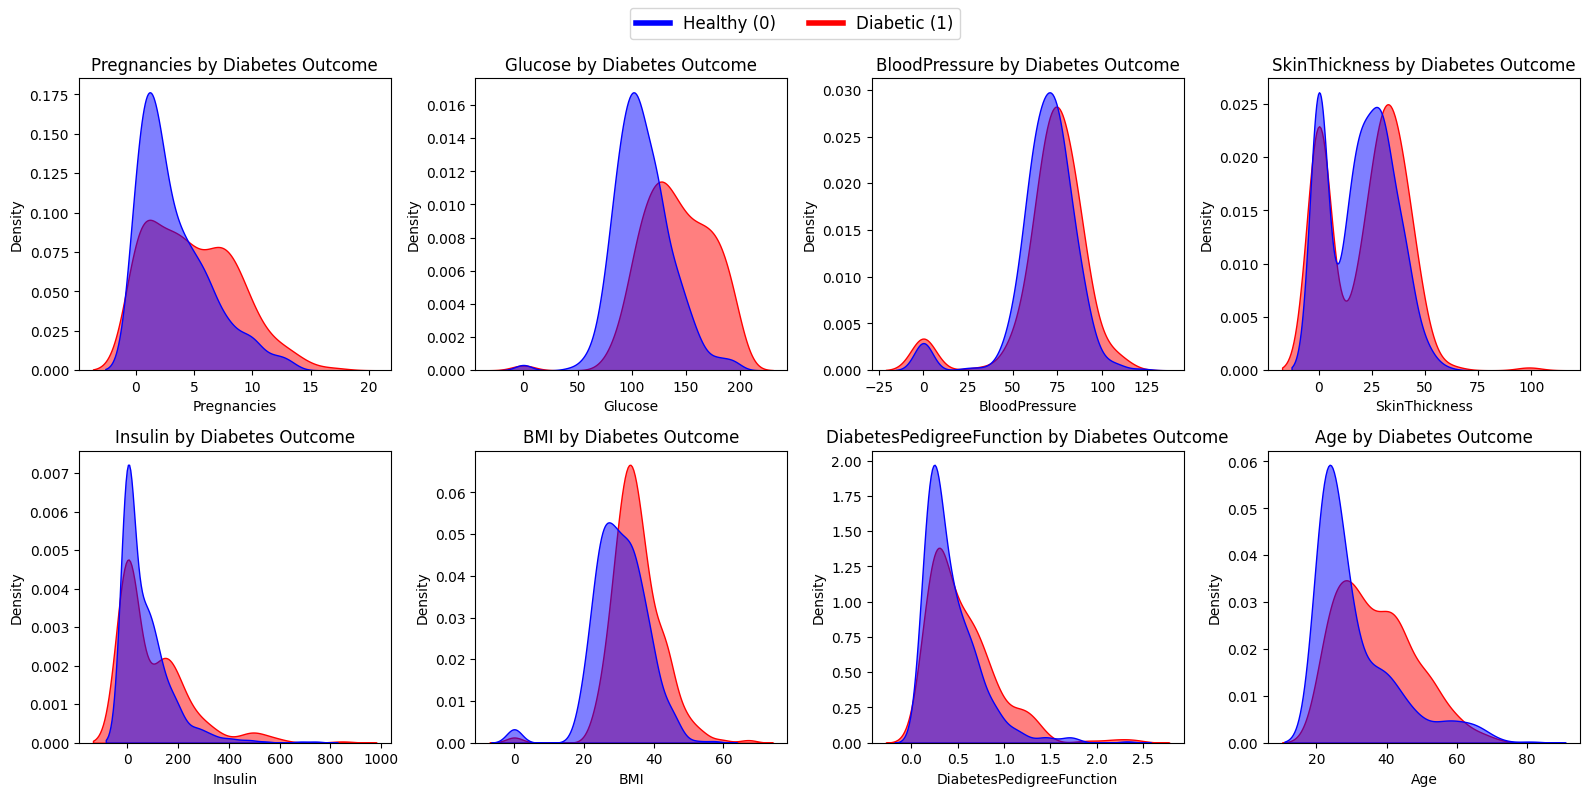

<Figure size 640x480 with 0 Axes>

In [11]:
# Eploration: Plot

# Generate sample data

# Create 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns
# Define legend labels and colors
legend_labels = ["Healthy (0)", "Diabetic (1)"]
colors = ["blue", "red"]

# Pregnancies
i_col = 0
i_row = 0
for i in range(num_features):
    sns.kdeplot(data=data, x=data.columns[i], hue='Outcome',ax=axes[i_row,i_col], fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5, legend=False)
    axes[i_row,i_col].set_title(data.columns[i]+" by Diabetes Outcome")
    axes[i_row,i_col].set_xlabel(data.columns[i])
    axes[i_row,i_col].set_ylabel("Density")
    i_col += 1
    if i_col == 4:
        i_row = 1
        i_col = 0       
# Add a single legend outside the subplots
handles = [plt.Line2D([0], [0], color=colors[0], lw=4),
           plt.Line2D([0], [0], color=colors[1], lw=4)]
fig.legend(handles, legend_labels, loc="upper center", fontsize=12, ncol=2)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to make space for legend
plt.show()
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## **Starting the Analysis**

Now that we have a solid understanding of the dataset, it's time to decide which technique to apply. When choosing a model, it’s important to consider two main factors:

1. **There is no one "correct" technique**. There are multiple approaches that could lead to the same result. A method that works well in one case might not work in another, but that doesn't make it incorrect. The key is to find the right balance between complexity, interpretability, and performance.
  
2. **We need to evaluate our methods**. We cannot blindly trust the results of a technique. We must assess its accuracy, robustness, and ability to generalize. Thus, applying multiple techniques, testing them, and comparing their performance will allow us to make informed decisions.

### 🤖 **What Methods Should We Consider?**
Given that this is a **binary classification** problem (Healthy [0] vs. Diabetes [1]), we can begin by testing a few well-known machine learning algorithms. Here are two options:

- **Logistic Regression**: A simple yet effective method for binary classification, often used when there is a linear relationship between the features and the outcome.
- **Random Forest**: A more complex, non-linear approach based on decision trees. It is robust and often works well with high-dimensional data, like ours, where relationships between features might not be immediately obvious.

### 🧠 **Hypothesis**
From our initial exploration, we might assume that **Random Forest** will outperform **Logistic Regression**, especially if the relationships between the features and the outcome are complex and non-linear. However, it’s essential to test both models to verify this hypothesis and compare their results.

### 🔬 **Next Steps: Model Training and Evaluation**
1. **Logistic Regression**: We will start by applying this model to establish a baseline. It will help us understand the simple relationships between the features and the outcome.
2. **Random Forest**: Once we have the baseline, we will apply Random Forest and evaluate its performance. We will also examine the feature importance scores, which might give us additional insights into which features play a more significant role in predicting diabetes.




[+] The Accuracy of the Logistic Regression model is 74.03 %

[+] The Accuracy of the Random Forest model is 76.62 %


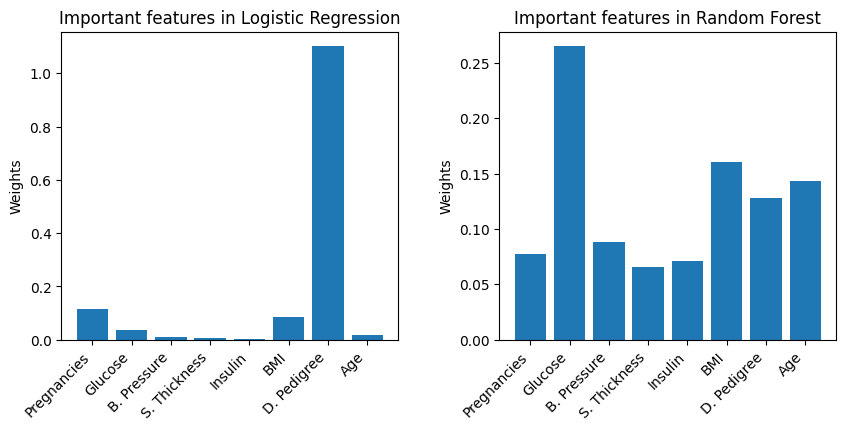

In [4]:
### Pre-process data ###
# Dataset
X = data.values[:,0:8] # features
y = data.values[:,-1]  # outcome

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

### Training Models ###

# Logistic Regression model
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)

# Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

### Evaluation of Models ###
score_lr = model_lr.score(X_test, y_test)   # Logistic Regression
score_rf = model_rf.score(X_test, y_test)   # Random Forest

print(f"\n[+] The Accuracy of the Logistic Regression model is {round(score_lr*100,2)} %")
print(f"\n[+] The Accuracy of the Random Forest model is {round(score_rf*100,2)} %")

### Get feature importance (absolute values of coefficients) ###
importance_lr = list(np.abs(model_lr.coef_[0]))       # Logistic Regression
importance_rf = list(model_rf.feature_importances_)   # Random Forest

#%% Figure Importance Feature
name = ["Pregnancies", "Glucose", "B. Pressure", "S. Thickness", "Insulin", "BMI", "D. Pedigree", "Age"] # Name of features
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 rows, 2 columns
axes[0].bar(name,importance_lr)
axes[0].set_xticks(range(len(name)))  # Set tick positions
axes[0].set_xticklabels(name, rotation=45, ha="right")
axes[0].set_title("Important features in Logistic Regression")
axes[0].set_ylabel("Weights")

axes[1].bar(name,importance_rf)
axes[1].set_xticks(range(len(name)))  # Set tick positions
axes[1].set_xticklabels(name, rotation=45, ha="right")
axes[1].set_title("Important features in Random Forest")
axes[1].set_ylabel("Weights")

plt.subplots_adjust(wspace=0.3)  # Adjust space between the subplots (increased wspace)
plt.show()


## **Observations**  

We can observe two key points:

- The **accuracy** of the Random Forest model is similar than that of Logistic Regression. 📊
- The **feature importance** differs between the two models. 🔑

However, it is crucial to **further evaluate** these models using **cross-validation** 🔄 to ensure their reliability and generalizability. ✔️


In [5]:
# Cross-Validation
iteration_max = 100
lr_list = []
rf_list = []
imp_lr = []
imp_rf = []
for i in range(iteration_max):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    ### Training Models ###

    # Logistic Regression model
    model_lr = LogisticRegression(max_iter=500)
    model_lr.fit(X_train, y_train)

    # Random Forest model
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)

    ### Evaluation of Models ###
    lr_list.append(model_lr.score(X_test, y_test))   # Logistic Regression
    rf_list.append(model_rf.score(X_test, y_test))   # Random Forest

    ### Get feature importance (absolute values of coefficients) ###
    imp_lr.append(np.array(np.abs(model_lr.coef_[0])))       # Logistic Regression
    imp_rf.append(np.array(model_rf.feature_importances_))   # Random Forest


## **Evaluating Model Performance**  

We have generated **100 models** using different training datasets, allowing us to assess the true performance of each model. We can now repeat the same plots as before and identify interesting insights.  

### **Comparing Both Models**  

Interestingly, after evaluation, we see that **both models have similar accuracy**. 📊 To determine whether the difference between them is statistically significant, we apply a **paired t-test** (since each model is trained on the same dataset). The results indicate that the difference is significant. 📈  

But here’s the key question: **The difference is significant, and so what?** 🤔  

Let's analyze this outcome.  

- We do not have a **huge dataset**, nor does it appear highly complex (with only **8 features**).  
- Despite training **100 models**, their performances remain **very similar**. 🔄  
- This suggests that the **error in the data is small**, making the difference between models statistically significant.  

However, **statistics is just a tool**—understanding how to interpret it is crucial. In this case, statistical significance does not necessarily mean one model is practically better than the other. 🔍  

At the end of the day, we have two models—**Logistic Regression** and **Random Forest**—that provide **similar performance**.  

**Is this possible?** Yes! ✅ As mentioned earlier, there are **multiple ways to achieve the same result**. Now, let's dive deeper into understanding our data and models. 🌟



[+] The score of the Logistic Regression is: 77.23%
[+] The score of the Random Forest is: 76.1%

[+] Statistical analysis comparing both model performance with a paired T-Test:
	- T-Statistic: 4.3064
	- P-Value: 0.0000
The difference is statistically significant.


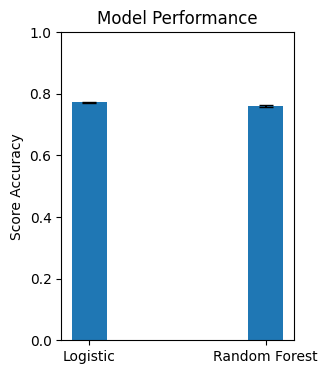

In [6]:

# Perform a paired t-test
t_stat, p_value = ttest_rel(np.array(lr_list), np.array(rf_list))

# Print results
print(f"[+] The score of the Logistic Regression is: {round(np.array(lr_list).mean()*100,2)}%")
print(f"[+] The score of the Random Forest is: {round(np.array(rf_list).mean()*100,2)}%")
print(f"\n[+] Statistical analysis comparing both model performance with a paired T-Test:")
print(f"\t- T-Statistic: {t_stat:.4f}")
print(f"\t- P-Value: {p_value:.4f}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("No significant difference.")

plt.figure(figsize=(3,4))
mean_data = [np.array(lr_list).mean(), np.array(rf_list).mean()]
sem_data = [sem(np.array(lr_list)), sem(np.array(rf_list))]
plt.bar(["Logistic", "Random Forest"], mean_data, yerr=(sem_data, sem_data), capsize=5, width=0.2)
plt.ylim([0, 1])
plt.ylabel("Score Accuracy")
plt.title("Model Performance")
plt.show()

## **Exploring Important Features**  

Next, let's explore the most important features. If we plot the **mean weight** for each model, we can see that the **important features** for Logistic Regression differ from those in Random Forest. 📊  

Of course! This makes sense because these are **different models**, and they process data in different ways. 🔄  

### **Example**  

🔍 The feature **`DiabetesPedigreeFunction`** may have a more **linear** relationship with the outcome. Since **Logistic Regression** works well with linear relationships, this feature might be **more important** for this model. On the other hand, **Random Forest** captures **non-linear** relationships, which means it may determine a **better interaction** with other features instead. 

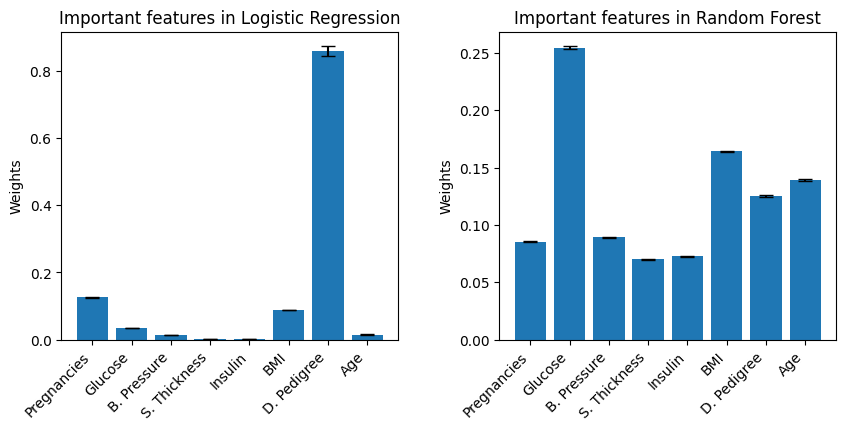

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 rows, 2 columns
mean_data = np.array(imp_lr).mean(0)
sem_data = list(sem(np.array(imp_lr),0))
axes[0].bar(name, mean_data, yerr=(sem_data, sem_data), capsize=5)
axes[0].set_xticks(range(len(name)))  # Set tick positions
axes[0].set_xticklabels(name, rotation=45, ha="right")
axes[0].set_title("Important features in Logistic Regression")
axes[0].set_ylabel("Weights")

mean_data = np.array(imp_rf).mean(0)
sem_data = list(sem(np.array(imp_rf),0))
axes[1].bar(name, mean_data, yerr=(sem_data, sem_data), capsize=5)
axes[1].set_xticks(range(len(name)))  # Set tick positions
axes[1].set_xticklabels(name, rotation=45, ha="right")
axes[1].set_title("Important features in Random Forest")
axes[1].set_ylabel("Weights")

plt.subplots_adjust(wspace=0.3)  # Adjust space between the subplots (increased wspace)
plt.show()

## **Feature Reduction and Model Efficiency**  

We have two models, and we know that **both perform similarly**, despite relying on **different important features**. Now, let's explore whether we can **reduce the number of features** used to train the model. 🔧  

### **Why Reduce Features?**  

So far, we have seen that both models provide similar results when using the **entire dataset**. However, if we can identify and retain only the **most important features**, we can:

- **Reduce the number of features** used for training. ➖  
- **Improve efficiency**, as fewer features mean **faster computation** and **less complexity** while maintaining similar performance. ⚡

### **Observations**  

Interestingly, when using only the **three most important features**:

- **Logistic Regression loses accuracy**, suggesting that it does not perform well with only these three features. ❌  
- **Random Forest maintains the same performance** as before, indicating that it is still able to capture key relationships in the data. ✅  

This insight helps us understand the strengths and limitations of each model when working with fewer features. 📉📈




[+] The Accuracy of the Logistic Regression model is 68.82 %

[+] The Accuracy of the Random Forest model is 73.81 %


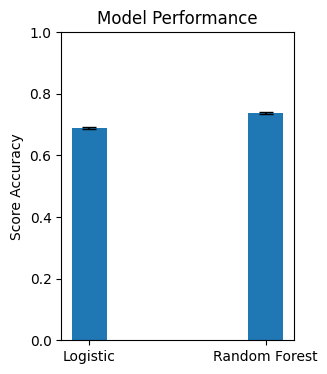

In [8]:
iteration_max = 100
lr_list = []
rf_list = []
for i in range(iteration_max):
    ### Pre-process data ###
    # Dataset Logistic Regression
    X = data[["DiabetesPedigreeFunction", "Pregnancies", "BMI"]].values # features
    y = data.values[:,-1]  # outcome
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Logistic Regression model
    model_lr = LogisticRegression(max_iter=500)
    model_lr.fit(X_train, y_train)
    ### Evaluation of Models ###
    score_lr = model_lr.score(X_test, y_test)   # Logistic Regression


    # Dataset Random Forest
    X = data[["Glucose", "BMI", "Age"]].values # features
    y = data.values[:,-1]  # outcome
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Random Forest model
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)
    ### Evaluation of Models ###
    score_rf = model_rf.score(X_test, y_test)   # Random Forest

    ### Evaluation of Models ###
    lr_list.append(score_lr)   # Logistic Regression
    rf_list.append(score_rf)   # Random Forest

print(f"\n[+] The Accuracy of the Logistic Regression model is {round(np.array(lr_list).mean()*100,2)} %")
print(f"\n[+] The Accuracy of the Random Forest model is {round(np.array(rf_list).mean()*100,2)} %")

plt.figure(figsize=(3,4))
mean_data = [np.array(lr_list).mean(), np.array(rf_list).mean()]
sem_data = [sem(np.array(lr_list)), sem(np.array(rf_list))]
plt.bar(["Logistic", "Random Forest"], mean_data, yerr=(sem_data, sem_data), capsize=5, width=0.2)
plt.ylim([0, 1])
plt.ylabel("Score Accuracy")
plt.title("Model Performance")
plt.show()

## **Choosing the Best Model**  

From our analysis, we observe that **reducing the number of features** affects Logistic Regression more significantly, as it loses more information. This suggests that **Random Forest** may be the better choice. However, the final decision depends on the **goal of your project**. 🎯  

### **Selecting Random Forest**  

In this case, we choose **Random Forest** as our model. Now, let's explore a key question:  

> **What is the risk of a person aged 54, with a height of 178 cm, weight of 96 kg, and glucose levels of 125 mg/dL, developing diabetes?** 🤔  

For this prediction, we use the following features in our **Random Forest model**:  

- **Age** 🧑‍⚕️  
- **BMI** (calculated from height and weight) ⚖️  
- **Glucose levels** 💉  

With these inputs, we can now apply our trained Random Forest model to estimate the likelihood of diabetes for this individual. 🔮



In [9]:
data_new = np.array([[125, 96.0/(178/100)**2,54]])

# Dataset Random Forest
X = data[["Glucose", "BMI", "Age"]].values # features
y = data.values[:,-1]  # outcome
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Random Forest model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
### Evaluation of Models ###
score_rf = model_rf.score(X_test, y_test)   # Random Forest


probabilities = model_rf.predict_proba(data_new)
print(f"Probability of being Healthy: {probabilities[0][0]:.2%}")
print(f"Probability of being Diabetic: {probabilities[0][1]:.2%}")

Probability of being Healthy: 8.00%
Probability of being Diabetic: 92.00%


## **Summary**  

In this project, we worked with a dataset containing patient information, including various features and their diabetes status (Diabetic or Non-Diabetic). We followed these key steps:

- **Step 1 - Data Exploration:** Understanding the **structure** of the dataset and visualizing the data. 🔍  
- **Step 2 - Defining the Goal:** Identifying suitable methods. There is **no single "correct" method**, so we considered multiple approaches. 🎯  
- **Step 3 - Exploring Different Methods:** Evaluating different techniques. Sometimes one method is enough, but in other cases, multiple approaches should be explored. 🔄  
- **Step 4 - Model Evaluation:** Testing and comparing classifiers to determine which model performs **best** and aligns with our goal. 🏆  
- **Step 5 - Justifying Model Choice:** Selecting the final model based on **data-driven arguments**, ensuring we understand **why** it is the best choice. ✔️  

By following this structured approach, we successfully built a model to **predict diabetes risk** while ensuring our decisions were well-supported by analysis. 📊

